# Data Fetching & Cleaning

In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import datetime
import seaborn as sns
import glob
import os
import numpy as np

### USDX & SP500

In [2]:
usdx = pd.read_csv('../data/NYSE_day.csv')
sp500 = pd.read_csv('../data/SP500.csv')

In [3]:
usdx = usdx.drop(columns=['Open', 'High', 'Low'])
usdx.head()

,Date,Close,Adj Close,Volume
0,1965-12-31,528.690002,528.690002,0.0
1,1966-01-03,527.210022,527.210022,0.0
2,1966-01-04,527.840027,527.840027,0.0
3,1966-01-05,531.119995,531.119995,0.0
4,1966-01-06,532.070007,532.070007,0.0


In [4]:
sp500.head()

,Date,SP500
0,11/19/12,1386.89
1,11/20/12,1387.81
2,11/21/12,1391.03
3,11/22/12,NaN
4,11/23/12,1409.15


<AxesSubplot:xlabel='Date'>

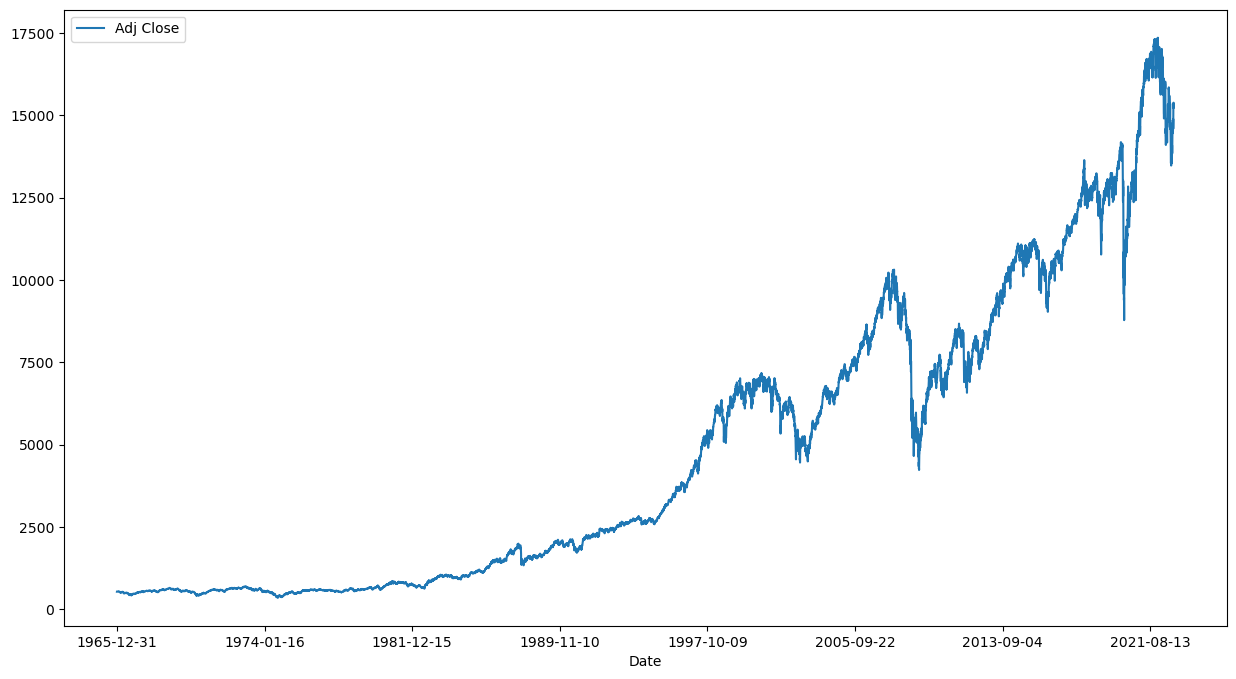

In [5]:
usdx.plot.line(x='Date',y='Adj Close',figsize=(15,8))

Date      object
SP500    float64
dtype: object


<AxesSubplot:xlabel='Date'>

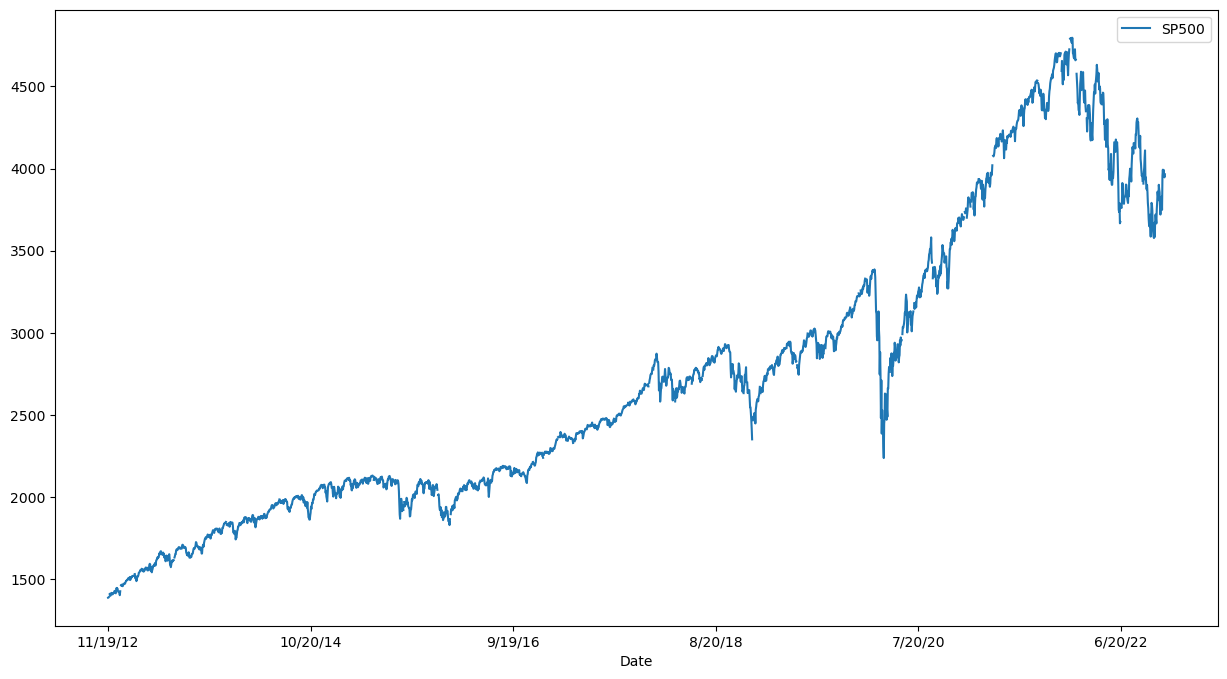

In [6]:
print(sp500.dtypes)
sp500['SP500']= sp500['SP500'].astype(float)
sp500.plot.line(x='Date',y='SP500',figsize=(15,8))

In [7]:
usdx = usdx.dropna()
usdx['week'] = [i.isocalendar()[:-1] for i in pd.to_datetime(usdx.Date)]
usdx['weekdays'] = [i.isocalendar()[2] for i in pd.to_datetime(usdx.Date)]

/var/folders/lc/5bgvdqzs30316llbpd2nwp1h0000gn/T/ipykernel_13199/3595075908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdx['week'] = [i.isocalendar()[:-1] for i in pd.to_datetime(usdx.Date)]
/var/folders/lc/5bgvdqzs30316llbpd2nwp1h0000gn/T/ipykernel_13199/3595075908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdx['weekdays'] = [i.isocalendar()[2] for i in pd.to_datetime(usdx.Date)]


In [8]:
sp500 = sp500.dropna()
sp500['week'] = [i.isocalendar()[:-1] for i in pd.to_datetime(sp500.Date)]
sp500['weekdays'] = [i.isocalendar()[2] for i in pd.to_datetime(sp500.Date)]

/var/folders/lc/5bgvdqzs30316llbpd2nwp1h0000gn/T/ipykernel_13199/803968698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['week'] = [i.isocalendar()[:-1] for i in pd.to_datetime(sp500.Date)]
/var/folders/lc/5bgvdqzs30316llbpd2nwp1h0000gn/T/ipykernel_13199/803968698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['weekdays'] = [i.isocalendar()[2] for i in pd.to_datetime(sp500.Date)]


In [9]:
last_adj_close_usdx = usdx[usdx['weekdays']==5][['week','Adj Close']].reset_index(drop=True)
last_adj_close_usdx['diff'] = [0]+[last_adj_close_usdx['Adj Close'][i]-last_adj_close_usdx['Adj Close'][i-1] for i in range(1,len(last_adj_close_usdx))]
last_adj_close_usdx['label'] = (last_adj_close_usdx['diff']>0).astype(int)
last_adj_close_usdx = last_adj_close_usdx.set_index(last_adj_close_usdx['week']).drop(columns='week').rename(columns={'Adj Close':'last_adj_close_usdx','diff':'usdx_last_diff','label':'usdx_last_label'})

In [10]:
usdx_ = usdx.groupby('week').mean()
usdx_['diff'] = [0]+[usdx_['Adj Close'][i]-usdx_['Adj Close'][i-1] for i in range(1,len(usdx_))]
usdx_['label'] = (usdx_['diff']>0).astype(int)

usdx_ = usdx_.rename(columns={'Adj Close':'mean_adj_close','diff':'usdx_mean_diff','label':'usdx_mean_label'})
usdx_ = usdx_.join(last_adj_close_usdx)
usdx_.reset_index(inplace=True)

usdx_R_1 = usdx_[['usdx_mean_label']].reset_index(drop=True)
usdx_R_1.to_csv('../data/usdx_R_mean.csv')

usdx_R_2 = usdx_[['usdx_last_label']].reset_index(drop=True).dropna()
usdx_R_2.to_csv('../data/usdx_R_last.csv')

usdx_ = usdx_[['week','usdx_mean_label','usdx_last_label']]

labels_usdx = usdx_[['week','usdx_mean_label','usdx_last_label']].dropna()

sum(usdx_.usdx_mean_label == usdx_.usdx_last_label)/len(usdx_)

0.7497473896934995

In [11]:
last_adj_close_sp500 = sp500[sp500['weekdays']==5][['week','SP500']].reset_index(drop=True)
last_adj_close_sp500['diff'] = [0]+[last_adj_close_sp500['SP500'][i]-last_adj_close_sp500['SP500'][i-1] for i in range(1,len(last_adj_close_sp500))]
last_adj_close_sp500['label'] = (last_adj_close_sp500['diff']>0).astype(int)
last_adj_close_sp500 = last_adj_close_sp500.set_index(last_adj_close_sp500['week']).drop(columns='week').rename(columns={'SP500':'last_adj_close_sp500','diff':'sp500_last_diff','label':'sp500_last_label'})

In [12]:
sp500_ = sp500.groupby('week').mean()
sp500_['diff'] = [0]+[sp500_['SP500'][i]-sp500_['SP500'][i-1] for i in range(1,len(sp500_))]
sp500_['label'] = (sp500_['diff']>0).astype(int)

sp500_ = sp500_.rename(columns={'SP500':'mean_adj_close','diff':'sp500_mean_diff','label':'sp500_mean_label'})
sp500_ = sp500_.join(last_adj_close_sp500)
sp500_.reset_index(inplace=True)

sp500_R_1 = sp500_[['sp500_mean_label']].reset_index(drop=True)
sp500_R_1.to_csv('../data/sp500_R_mean.csv')
 
sp500_R_2 = sp500_[['sp500_last_label']].reset_index(drop=True).dropna()
sp500_R_2.to_csv('../data/sp500_R_last.csv')


sp500_ = sp500_[['week','sp500_mean_label','sp500_last_label']]

labels_sp500 = sp500_[['week','sp500_mean_label','sp500_last_label']].dropna()

sum(sp500_.sp500_mean_label == sp500_.sp500_last_label)/len(sp500_)

0.7452107279693486

#### Cleaning

In [13]:
tweets_df = []
path = '../data/Tweets/raw/'

for filename in glob.glob(path+'*.csv'):
   this_df = pd.read_csv(filename)
   tweets_df.append(this_df)

In [14]:
df = pd.concat(tweets_df).reset_index(drop=True).drop_duplicates().dropna()
df

,id,created_at,favorite_count,retweet_count,text
0,1575977826875953152,2022-09-30 22:36:08+00:00,604.0,85.0,"September 2022 was a brutal month, with stocks..."
1,1574900189868961792,2022-09-27 23:14:00+00:00,1.0,0.0,"@cetello For a implied forward PE, divide the ..."
2,1574533395727626240,2022-09-26 22:56:29+00:00,162.0,16.0,You can critique the Fed for not acting sooner...
3,1574533393890484224,2022-09-26 22:56:29+00:00,304.0,60.0,Your views are likely to be very different fro...
4,1574533389352198144,2022-09-26 22:56:28+00:00,203.0,34.0,"I gave it my best shot, knowing that I will be..."
...,...,...,...,...,...
48279,1402708705657851904,2021-06-09 19:26:31+00:00,3.0,0.0,Excel SUM Shortcut\n\nExcel Sum shortcut is ve...
48280,1402708165012066304,2021-06-09 19:24:22+00:00,3.0,0.0,Border in Excel\nBorder are outlined to data t...
48281,1402707477188124672,2021-06-09 19:21:38+00:00,3.0,0.0,IFERROR with VLOOKUP to Get Rid of #NA Errors\...
48282,1402692162345607168,2021-06-09 18:20:46+00:00,3.0,0.0,OR Function in Excel\nhttps://t.co/mXPJm8SV6e\...


In [15]:
df['week'] = [i.isocalendar()[:-1] for i in pd.to_datetime(df.created_at)]

In [16]:
df = df.sort_values(by='week')
df = df[['week','favorite_count','retweet_count','text']].reset_index(drop=True)

In [17]:
df = df[df['favorite_count']>50] # filter out tweets that is probably unseen

In [18]:
# Cleaning Pipeline 
import re
import spacy
from spacy.language import Language


pipeline = spacy.load('en_core_web_sm')

# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "number"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/\$]", " "), # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

train_sentences = []
for i, d in enumerate(df['text']):
    for repl in replace:
        d = re.sub(repl[0], repl[1], d)
    train_sentences.append(d)


@Language.component("Preprocessor")
def ng20_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)


pipeline.add_pipe("Preprocessor")

<function __main__.ng20_preprocess(doc)>

In [19]:
# Apply Pipeline
sentences = []
for i, d in enumerate(df['text']):
    for repl in replace:
        d = re.sub(repl[0], repl[1], d)
    sentences.append(d)
    
docs = []
for sent in sentences:
    docs.append(pipeline(sent))

df['cleaned'] = docs

In [20]:
# Stemming
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
  
# choose some words to be stemmed
texts = df.cleaned

stemmed = []
for text in texts: # Looping each file
    # Break down to words and do stemming
    this_file = []
    for w in text.split():
        this_file.append(ps.stem(w))
    stemmed.append(' '.join(this_file))

df['stemmed'] = stemmed

In [21]:
df.head()

,week,favorite_count,retweet_count,text,cleaned,stemmed
227,"(2012, 36)",79.0,54.0,First week of my 15-week valuation class! Four...,week number week valuation class way follow we...,week number week valuat class way follow websi...
267,"(2013, 5)",52.0,47.0,New semester starts for my corporate finance &...,new semester start corporate finance amp valua...,new semest start corpor financ amp valuat clas...
295,"(2013, 13)",94.0,72.0,The equity risk premium is the key to investin...,equity risk premium key investing amp valuatio...,equiti risk premium key invest amp valuat know...
312,"(2013, 26)",64.0,64.0,Is Google more valuable than Apple? Depends on...,google valuable apple depend value measure fir...,googl valuabl appl depend valu measur firm vs ...
333,"(2013, 35)",74.0,38.0,My Fall 2013 valuation class starts Sept 4. Yo...,fall number valuation class start sept number ...,fall number valuat class start sept number wel...


In [22]:
df = df[['week','stemmed']].rename(columns={'stemmed':'text'})

In [23]:
df.head()

,week,text
227,"(2012, 36)",week number week valuat class way follow websi...
267,"(2013, 5)",new semest start corpor financ amp valuat clas...
295,"(2013, 13)",equiti risk premium key invest amp valuat know...
312,"(2013, 26)",googl valuabl appl depend valu measur firm vs ...
333,"(2013, 35)",fall number valuat class start sept number wel...


In [24]:
df = df[df['text']!=''] # filter out empty string

#### Attaching labels

In [25]:
df = df.merge(labels_sp500)
df = df.merge(labels_usdx)
# df.isnull().sum()
df = df.drop(columns='week')
df.to_csv('../data/all_clean.csv')

In [26]:
df.head()

,text,sp500_mean_label,sp500_last_label,usdx_mean_label,usdx_last_label
0,new semest start corpor financ amp valuat clas...,1,1.0,1,1.0
1,googl valuabl appl depend valu measur firm vs ...,0,1.0,0,1.0
2,fall number valuat class start sept number wel...,0,0.0,0,0.0
3,assum tesla grow audi like revenu number b amp...,1,1.0,1,1.0
4,twitter snumber valu compani bargain numberb f...,0,0.0,0,0.0
